In [53]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import math
from scipy import stats
from sklearn import linear_model

# Loading the data

In [54]:
movies = pd.read_pickle('../../../data/movies.pkl')

# Preprocessing

In [96]:
movies['Movie_release_date'] = pd.to_datetime(movies['Movie_release_date'], format = 'mixed', errors='coerce', utc=True)
movies['Movie_Release_Year'] = movies['Movie_release_date'].dt.year
movies['Movie_Release_Year'] = movies['Movie_Release_Year'].fillna(0.0).astype(int)

# Movie release year distribution

In [ ]:
start_year = 1930
end_year = 1955

def plot_movies_release_distribution(df, start_year, end_year):
    movies_in_range = df[(df['Movie_Release_Year'] >= start_year) & (df['Movie_Release_Year'] <= end_year)]
    sns.histplot(movies_in_range['Movie_Release_Year'], bins=end_year-start_year+1, kde=False)
    plt.title(f'Movies released between {start_year} and {end_year}')
    plt.show()

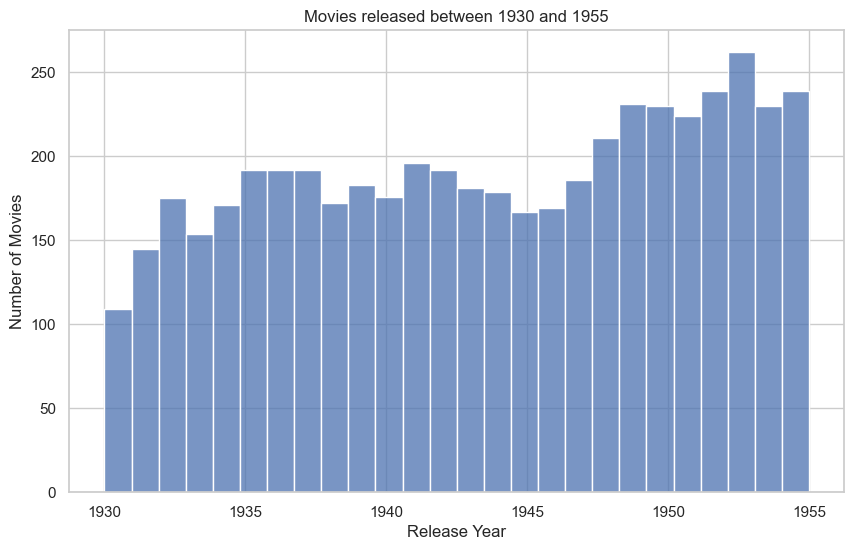

In [111]:
plot_movies_release_distribution(movies, 1930, 1955)

Let's make this plot interactive !

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

def plot_movies_release_distribution(df, start_year, end_year):
    # Filter movies within the selected year range
    movies_in_range = df[(df['Movie_Release_Year'] >= start_year) & (df['Movie_Release_Year'] <= end_year)]
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(movies_in_range['Movie_Release_Year'], bins=end_year-start_year+1, kde=False)
    plt.title(f'Movies released between {start_year} and {end_year}')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Movies')
    plt.show()

# Create interactive widgets for selecting start and end years
interact(
    plot_movies_release_distribution,
    df=widgets.fixed(movies), 
    start_year=widgets.IntSlider(min=1910, max=2014, value=1930, description='Start Year'),
    end_year=widgets.IntSlider(min=1910, max=2014, value=1955, description='End Year')
)


interactive(children=(IntSlider(value=1930, description='Start Year', max=2014, min=1910), IntSlider(value=195…

<function __main__.plot_movies_release_distribution(df, start_year, end_year)>

# Box Office Revenue ?

In [101]:
def plot_movies_box_office_distribution(df, start_year, end_year):
    movies_in_range = df[(df['Movie_Release_Year'] >= start_year) & (df['Movie_Release_Year'] <= end_year)]
    sns.barplot(x='Movie_Release_Year', y='Movie_box_office_revenue', data=movies_in_range)
    plt.title(f'Box office revenue for movies released between {start_year} and {end_year}')
    plt.show()

In [102]:
no_nan_revenue = movies[movies['Movie_box_office_revenue'].apply(lambda x: not math.isnan(x))]

In [103]:
len(no_nan_revenue)

6920

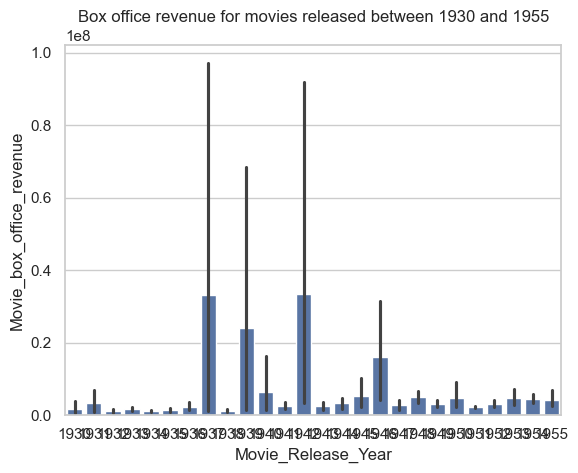

In [104]:
plot_movies_box_office_distribution(no_nan_revenue, 1930, 1955)

In [105]:
only_war = movies[movies['Movie_genres'].apply(lambda x: x is not None and 'War film' in x)]